In [1]:
from udntools.region import ServiceRegion
from udntools.utils.plot import get_circle
import warnings
warnings.filterwarnings("ignore")

In [2]:
region = ServiceRegion(0, 100,
                       0, 100,
                       12, 1000,
                       bs_distribution="single_circle",
                       bs_radius_1=30,
                       if_fix_bs=False)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

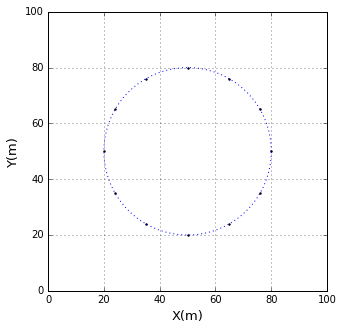

In [4]:
# plt.scatter(service_region.bs_position_[:,0], service_region.bs_position_[:,1])
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.scatter(region.bs_position_[:,0],
            region.bs_position_[:,1],
            s=2,
            c='b')
x_ave = (region.x_min + region.x_max) / 2
y_ave = (region.y_min + region.y_max) / 2
circle_array = get_circle(x_ave, y_ave, region.bs_radius_1_)

plt.plot(circle_array[:,0],
         circle_array[:,1],
         linestyle=':')

plt.xlim(region.x_min, region.x_max)
plt.ylim(region.y_min, region.y_max)
plt.xlabel("X(m)", size=13)
plt.ylabel("Y(m)", size=13)
plt.grid(True)

fig.savefig('single_circle_bs_station.pdf')
fig.savefig('single_circle_bs_station.png')

plt.show()

In [5]:
from udntools.channel import BaseChannel
ergodic_ue =  np.reshape(region.ground_position_, (-1,2)).T

In [6]:
def e_capacity(alpha, iter):
    channel = BaseChannel(alpha)
    capacity = np.zeros(np.shape(region.ground_position_[:,:,0]))
    iter = 100
    for i in range(0,iter):
        sir_one_time = channel.sir_vector(region.bs_position_,
                                          ergodic_ue)
        capacity_one_time = np.log2(1 + sir_one_time)
        capacity += np.reshape(capacity_one_time,
                               np.shape(region.ground_position_[:,:,0]))
    capacity /= iter
    return capacity

In [7]:
capacity_4 = e_capacity(4.0, 100)
capacity_2 = e_capacity(2.0, 100)

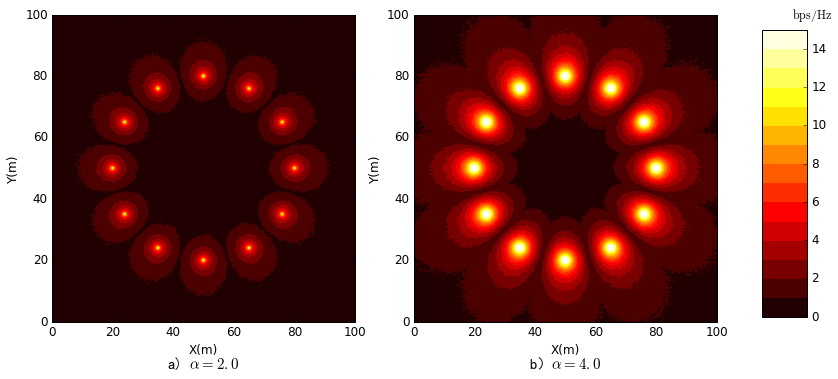

In [71]:
import matplotlib
params = {'axes.labelsize': 12,'axes.titlesize':12, 'text.fontsize': 15, 'legend.fontsize': 12, 'xtick.labelsize': 12, 'ytick.labelsize': 12}
matplotlib.rcParams.update(params)

fig = plt.figure(figsize=(12.6, 5.5))

ax = fig.add_subplot(121)
im1 = ax.contourf(region.ground_position_[:,:,0],
                  region.ground_position_[:,:,1],
                  capacity_2,
                  np.linspace(0, 15, 16),
                  alpha=1,
                  cmap=plt.cm.hot,
                  antialiased=True)
for c in im1.collections:
    c.set_edgecolor("face")
plt.xlim(region.x_min, region.x_max)
plt.ylim(region.y_min, region.y_max)
plt.xlabel("X(m)")
plt.ylabel("Y(m)")
plt.title("a) $\\alpha=2.0$",fontproperties = 'SimHei', loc='center',x=0.5, y=-0.17)
plt.tight_layout()
ax = fig.add_subplot(122)
im2 = ax.contourf(region.ground_position_[:,:,0],
                  region.ground_position_[:,:,1],
                  capacity_4,
                  np.linspace(0, 15, 16),
                  alpha=1,
                  cmap=plt.cm.hot,
                  antialiased=True)
# This is the fix for the white lines between contour levels
for c in im2.collections:
    c.set_edgecolor("face")
plt.xlim(region.x_min, region.x_max)
plt.ylim(region.y_min, region.y_max)
plt.xlabel("X(m)")
plt.ylabel("Y(m)")
plt.title("b）$\\alpha=4.0$",fontproperties = 'SimHei', loc='center',x=0.5, y=-0.17)
plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.18, 0.05, 0.725])
fig.colorbar(im1, cax=cbar_ax).set_label("$\mathrm{bps/Hz}$", labelpad=-15, y=1.08, rotation=0)
plt.savefig("single_circle_capacity_hotmap_30_12.pdf")   
plt.savefig("single_circle_capacity_hotmap_30_12.png")  

plt.show()